# Computer Vision for Pneumonia Detection


# 1. Research and Data Exploration




## 1.1 Research

Using deep learning techniques, the article hopes to increase the accuracy of pneumonia diagnosis. The authors train the model utilizing a carefully selected dataset of chest X-rays labelled for pneumonia and non-pneumonia patients using a CNN architecture called VGGNet. The study's strength is enhanced by the paper's thorough approach for data pre-processing, model design, and hyperparameter tweaking.

The study's utilisation of deep learning techniques is one of its major merits. To train the model, the scientists create a new state of the art CNN model that does not use any transfer learning. However use a cutting-edge CNN architecture VGGNet, ResNet  which has demonstrated superior performance in a variety of picture classification applications is used to compare the new architecture with these models. In addition, the authors do substantial hyperparameter tweaking to maximise the model's performance, which is an important part of developing efficient deep learning models. Furthermore, the scientists employ a well-curated dataset of chest X-rays labelled for pneumonia and non-pneumonia instances, which is critical for training and assessing the CNN's performance.

The authors assess the CNN's performance using a variety of measures, including accuracy, precision, recall, F1-score, and AUC. According to the study, these parameters have high values, demonstrating that the CNN can efficiently detect pneumonia in chest X-rays. The study's use of rigorous assessment measures is among its strengths. Metrics such as accuracy, precision, recall, F1 score, and AUC are included in the provided metrics, which give a full evaluation of the suggested approach's performance. These indicators' high values imply that the suggested technique has a strong potential for clinical applications, such as aiding radiologists in identifying pneumonia.

A major strength of the paper is the use of generative adversarial network(GANs) to diversify the dataset as it was identified that the dataset used had a case of imbalance. There were more cases of chest x-rays labelled for non-pneumonia than for pneumonia. GANs helped created more images and these were used to help in training. 

The comparison to existing approaches for pneumonia identification is one possible strenghts of the study. The study compares the CNN's performance to other well-established methods for image classification, such as the transfer learning models, which assist to demonstrate the suggested approach's  significance. 

However, a major flaw of this paper is the ability to reproduce this papers findings. As much as all parameters were stated it was a challenge to reproduce their results and no code repository was located thus lowering the papers reliability.Additionally, the study's utilises only one dataset and thus limits the models generalisation.

Finally, this paper proposes an intriguing method for detecting pneumonia using deep learning techniques. The study presents a thorough assessment of the CNN's performance, demonstrating its potential for accurate pneumonia diagnosis. Further study is needed, however, to confirm the findings, compare the suggested strategy to current methodologies.

(Szepesi and Szilagyi 2022)


## 1.2 Data Exploration

In this section the dataset which was used in the above section will be loaded and explored. A lot of the code used was adapted from the CM4126 Lab 5.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, AveragePooling2D,Flatten, Dense, Conv2D,MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# data stored in the local drive 
main_dirction_path = '/content/gdrive/MyDrive/cm4126-kaggle/input/chest_xray'
print(os.listdir(main_dirction_path))


['__MACOSX', 'chest_xray', 'test', 'train', 'val']


In [4]:
# path for train/ test and validate folders
train_folder_path = main_dirction_path + '/train/'
test_folder_path = main_dirction_path + '/test/'
val_folder_path = main_dirction_path + '/val/'


In [5]:
labels = os.listdir(train_folder_path)
img_size = 112 # This image size was used as this was the size used in paper in section 1.1
batch_size = 16
n_epochs = 25 
labels

['NORMAL', 'PNEUMONIA']

In [6]:
train_n_path = train_folder_path+'/NORMAL/'
train_p_path = train_folder_path+'/PNEUMONIA/'

test_n_path = test_folder_path+'/NORMAL/'
test_p_path = test_folder_path+'/PNEUMONIA/'

In [28]:
print(f'Total training images is  {len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))}')
print(f'Total testing images is {len(os.listdir(test_n_path)) + len(os.listdir(test_p_path))}') 

Total training images is  5216
Total testing images is 624


Images in this dataset are not the same size thus need to be resized as for CNN models all images must be the same size

In [7]:
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Validation Set
Now, we load the training set, but we need to split it into train and validation, this is simply because the original val set in this dataset is relatively small:

In [8]:
train = get_training_data(train_folder_path)
temp = np.random.permutation(train) # Shuffle the data
train_size = 0.8 # Sets the split ratio

In [9]:
# Assigns 80% to training array and 20% to validation set
train, val = temp[:(int(train_size*len(temp)))], temp[int(train_size*len(temp)):]

In [10]:
# Load the datasets 

test = get_training_data(test_folder_path)

In [29]:
print(f'The shape of the training set is {train.shape}') 
print(f'The shape of the test set is {test.shape}') 
print(f'The shape of the val set is {val.shape}') 

The shape of the training set is (4172, 2)
The shape of the test set is (624, 2)
The shape of the val set is (1044, 2)


<Axes: >

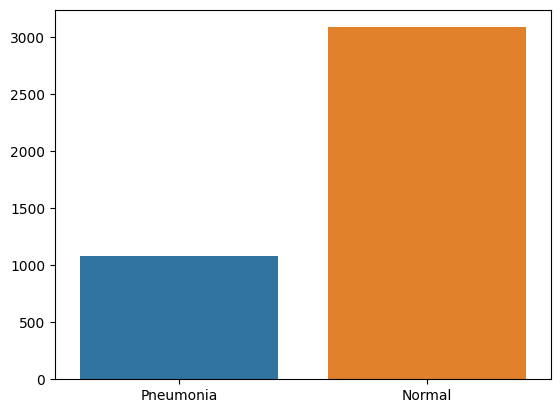

In [30]:
import collections
import seaborn as sns

l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")

counts = collections.Counter(l)
Pneumonia = counts['Pneumonia']
Normal = counts['Normal']

# Create a bar chart using seaborn
sns.barplot(x=['Pneumonia', 'Normal'], y=[Pneumonia, Normal])



<Axes: >

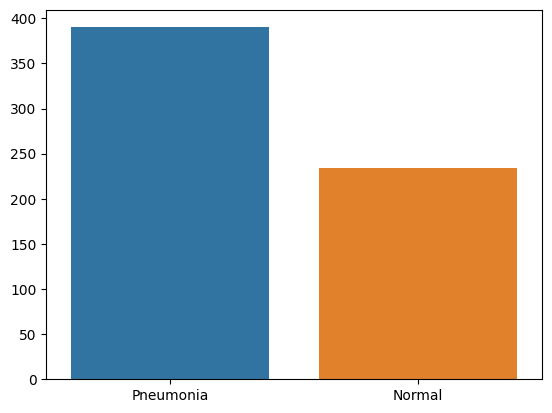

In [45]:
# for testing set
l = []
for i in test:
  if(i[1] == 0):
     l.append("Normal")
  else:
    l.append("Pneumonia")

counts = collections.Counter(l)
Pneumonia = counts['Pneumonia']
Normal = counts['Normal']

# Create a bar chart using seaborn
sns.barplot(x=['Pneumonia', 'Normal'], y=[Pneumonia, Normal])


In [46]:
def show_sample_images (number, normal=True):
    plt.figure(figsize=(12,12))
    if normal == True:
        for n in range(number):
            normal_img = os.listdir(train_n_path)[n]
            normal_img_address = train_n_path+normal_img
            normal_load = Image.open(normal_img_address)
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(normal_load, cmap ='gray')
            plt.title("NORMAL")
    else:
        for n in range(number):
            pneumonia_img =  os.listdir(train_p_path)[n]
            pneumonia_img_address = train_p_path+pneumonia_img
            pneumonia_load = Image.open(pneumonia_img_address)
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(pneumonia_load, cmap ='gray')
            plt.title("PNEUMONIA")

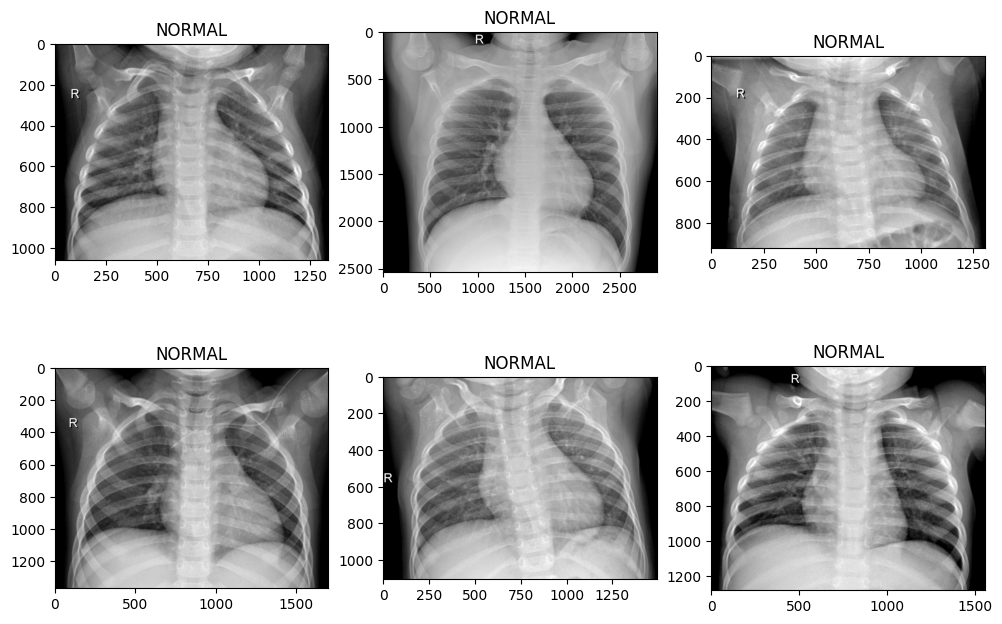

In [47]:
# Show normal images
numberImg= 6
show_sample_images(numberImg)

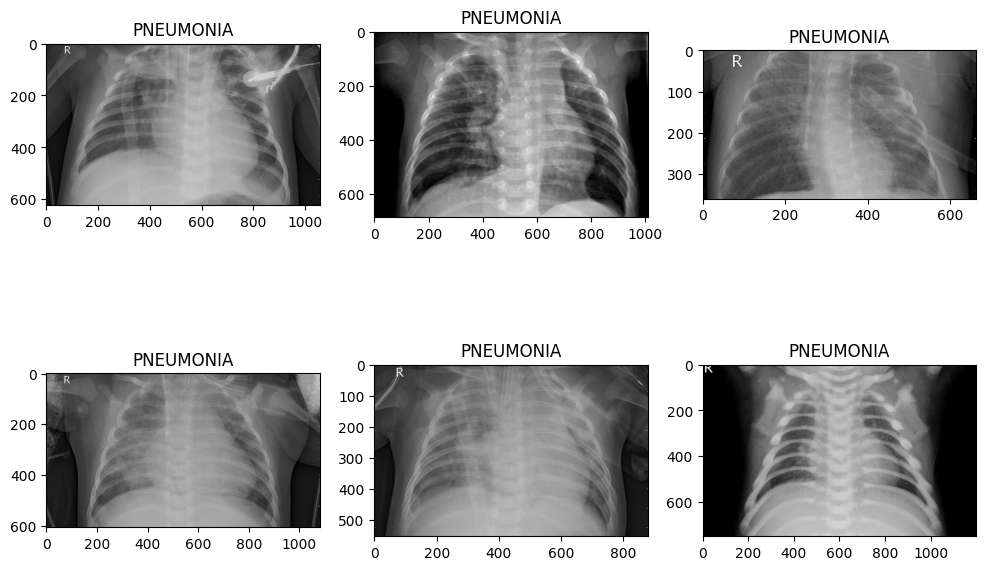

In [34]:
# show pneumonia images 
show_sample_images(6,False)

In [56]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [36]:
print(f'Number of images in the training set is {len(x_train)}')

Number of images in the training set is 4172


In [57]:
# Normalise the data 

x_train = np.array(x_train) / 255.0
x_val = np.array(x_val) / 255.0
x_test = np.array(x_test) / 255.0

In [58]:
# resize data for deep learning (img_size above is set to 244 by 244)
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(

      featurewise_center=False, 
      samplewise_center=False, 
      featurewise_std_normalization=False, 
      samplewise_std_normalization=False, 
      zca_whitening=False, 
      rotation_range = 30, 
      zoom_range = 0.2, 
      
      width_shift_range = 0.1, 
      height_shift_range = 0.1, 
      horizontal_flip = True, 
      vertical_flip=False) 

datagen.fit(x_train)



According to Pal and Sudeep (2016), using raw data to any classification approach does not generate excellent accuracy. They conducted experiments comparing pre-processing strategies such as normalisation, standardisation, and Zero Component Analysis (ZCA), with ZCA proving to be the best method for raw data as it enhanced CNN performance. Thus ZCA_Whitening was set to true to be used in the code.

# 2. Baseline Model 

This is a basic CNN model, this model is built using 20 layers as ....... (). The architecture used was a mixture of the 5th Lab and based of a paper titled "Malaria Disease Detection Using CNN Technique with SGD, RMSprop
and ADAM Optimizers." This paper provided clarification on which parameters to use, a major one being the optimizer. The ADAM optimizer was chosen for strong performance on a basic CNN with a simple architecture outperforming the other two optimizers(Kumar et al 2020). This architecture provided the values for the filter sizes to be used as the range dor filter sizes is 16 to 1024. 

Taking inspiration from the lab and other standard practices batch normalization was implemented as just adding Batch Normalization to a cutting-edge image classification algorithm speeds up training significantly. We achieve the previous state of the art with just a small fraction of training steps and then beat the state of the art in single-network image categorization using Batch Normalization. Additionally, by merging several models trained using Batch Normalization, the models outperform the best known ImageNet system by a wide margin(Ioffe and Szegedy 2015) 

The reason the use of max pooling is applied to the cnn model is that Walter (2022) applied local max pooling to a paper done by another researcher who had not used max pooling and proved that max pooling was necessary for image classification as it did improve results. 

In [74]:
# Model setup
model=Sequential() 
model.add(Conv2D(32,(3,3),activation='relu',padding= 'same',name='conv_1',input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),name='maxpool_1')) 
model.add(Conv2D(64,(3,3),activation='relu',padding= 'same',name='conv_2',input_shape = (img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2),name='maxpool_2')) 
model.add(Conv2D(128,(3,3),activation='relu',padding= 'same',name='conv_3',input_shape = (img_size, img_size, 3))) 
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),name='maxpool_3')) 
model.add(Conv2D(128,(3,3),activation='relu',padding= 'same',name='conv_4',input_shape = (img_size, img_size, 3))) 
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),name='maxpool_4')) 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',name='dense_1'))
model.add(Dense(128,activation='relu',name='dense_2'))
model.add(Dense(1,activation='sigmoid',name='output'))

model.compile(
              optimizer = 'adam', loss = 'binary_crossentropy', 
              metrics = ['accuracy']
              )


In [67]:
# model summary (see the number of trainable parameters)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 56, 56, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 56, 56, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 56, 56, 64)       

Just like in the lab, the choosen dataset has a problem with class distribution which was noted in section 1.2 The paper in section 1.1 used a generative adversarial network was used to generate further images for the minority class.However as stated it did not use these generated images in testing of the model. Thus the code below was taken to give more weight to the the monority classes. Rajaraman et al. (2022) stated "The bias introduced by class-imbalanced training is commonly addressed by tuning the class weights." Though they followed up acknowleding the limits class weight tuning does the simplicity is the reason it was chosen to address and issue the paper failed to address. 

In [42]:
total = len(os.listdir(train_n_path)) + len(os.listdir(train_p_path))
neg = len(os.listdir(train_n_path))
pos = len(os.listdir(train_p_path))

weight_for_0 = 1 /neg * (total/2.0)
weight_for_1 = 1/pos *(total/2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 1.9448173005219984, 1: 0.6730322580645162}

In [43]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [55]:
print(y_val.shape)

(0,)


In [119]:
# Start training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), 
                    epochs = n_epochs, validation_data = datagen.flow(x_val, y_val), 
                    callbacks = [learning_rate_reduction], class_weight = class_weight)

Epoch 1/25
261/261 [==============================] - 17s 54ms/step - loss: 0.4984 - accuracy: 0.8370 - val_loss: 1.1224 - val_accuracy: 0.7538 - lr: 0.0010
Epoch 2/25
261/261 [==============================] - 15s 56ms/step - loss: 0.2737 - accuracy: 0.8852 - val_loss: 4.4514 - val_accuracy: 0.7538 - lr: 0.0010
Epoch 3/25
261/261 [==============================] - 14s 54ms/step - loss: 0.2271 - accuracy: 0.9106 - val_loss: 0.6104 - val_accuracy: 0.7739 - lr: 0.0010
Epoch 4/25
261/261 [==============================] - 14s 53ms/step - loss: 0.2394 - accuracy: 0.9082 - val_loss: 1.0807 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 5/25
261/261 [==============================] - 14s 53ms/step - loss: 0.2033 - accuracy: 0.9178 - val_loss: 2.2545 - val_accuracy: 0.7577 - lr: 0.0010
Epoch 6/25
261/261 [==============================] - ETA: 0s - loss: 0.1922 - accuracy: 0.9219
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
261/261 [==============================] - 

<Axes: >

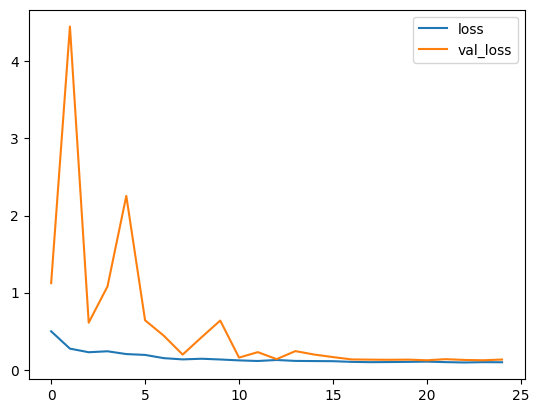

In [120]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

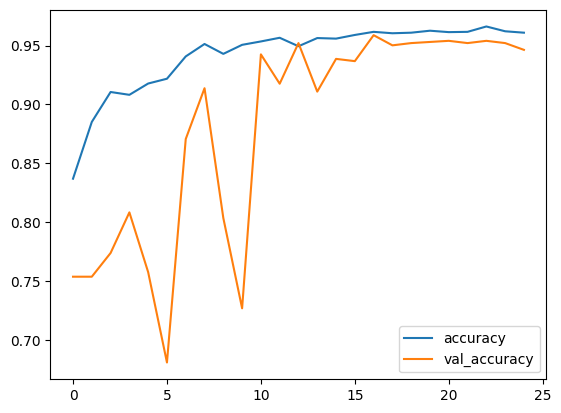

In [121]:
losses[['accuracy','val_accuracy']].plot()

In [122]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 8ms/step - loss: 0.2838 - accuracy: 0.9119
Loss of the model is -  0.28378304839134216
20/20 [==============================] - 0s 8ms/step - loss: 0.2838 - accuracy: 0.9119
Accuracy of the model is -  91.18589758872986 %


In [123]:
from tensorflow.keras.models import load_model
#model.save('CNN_PNEUMONIA.h5') # 
#cnn_model = load_model("./CNN_PNEUMONIA.h5")
predictions=model.predict(x_test) 
pred_labels= np.where(predictions>0.5, 1, 0)

20/20 [==============================] - 0s 7ms/step


In [124]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.89      0.88      0.88       234
   Normal (Class 1)       0.93      0.93      0.93       390

           accuracy                           0.91       624
          macro avg       0.91      0.90      0.91       624
       weighted avg       0.91      0.91      0.91       624



<Axes: >

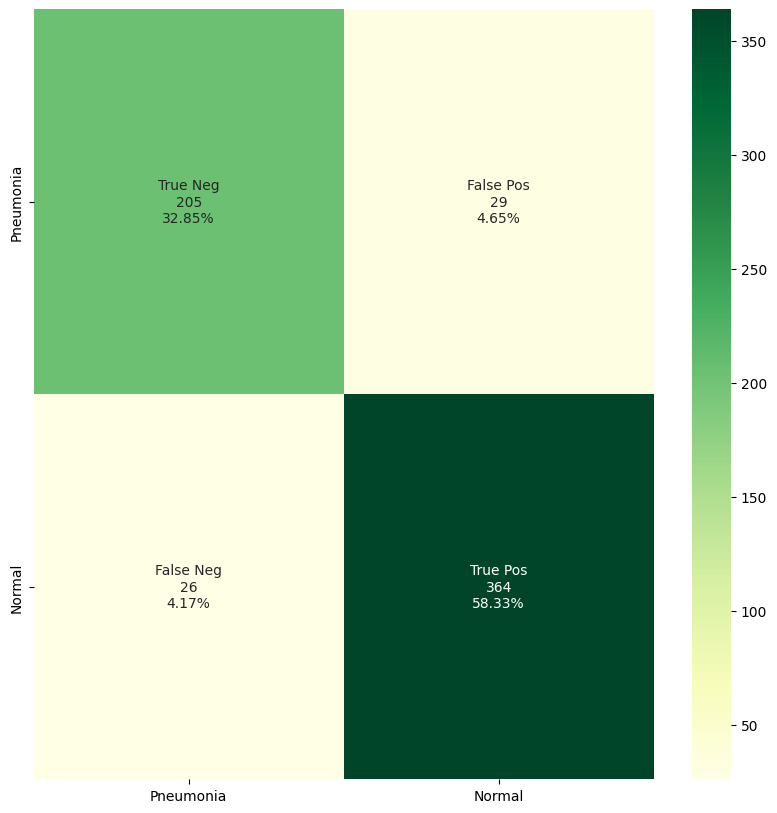

In [125]:
cf_matrix = confusion_matrix(y_test, pred_labels)
plt.figure(figsize = (10,10))
classes = ['Pneumonia','Normal']
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn" ,
            xticklabels = classes,yticklabels = classes
           )

In [127]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)
print('AUC = ')
print(auc(fpr, tpr))

AUC = 
0.9545036160420776


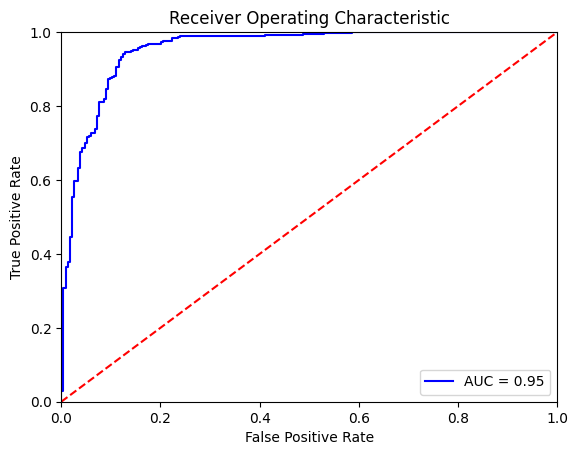

In [131]:
# method I: plt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#code adapted from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# 3. Solution Improvement

To improve the solution a few steps have been applied
 

1.   Image Enhancement using Clahe Filter 
2.   Transfer Learning was applied 
3.   Fine Tuning of the transfer learning 



Image enhancement using Clahe Filter 


In [92]:
def show_enhanced_images(number, normal=True):
    plt.figure(figsize=(8,8))
    if normal == True:
        for n in range(number):
            normal_img = os.listdir(train_n_path)[n]
            normal_img_address = train_n_path+normal_img
            normal_load = Image.open(normal_img_address)
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(normal_load, cmap ='gray')
            plt.title("NORMAL")
    else:
        for n in range(number):
            pneumonia_img =  os.listdir(train_n_path)[n]
            pneumonia_img_address = train_n_path+pneumonia_img
            pneumonia_load = Image.open(pneumonia_img_address)
            img_1_np = np.array(pneumonia_load)  #Code adapted from https://www.kaggle.com/code/kyleberdy/advanced-image-preprocessing-with-clahe?scriptVersionId=50969115&cellId=14
            clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
            clahe_img_1 = clahe.apply(img_1_np)
            ax = plt.subplot(int(number/2),int(number/2),n+1)
            plt.imshow(clahe_img_1, cmap ='gray')
            plt.title("Clahe")

 The code above is modified from section 1.2 to show what the effect on applying the image enhancement would make the images look like

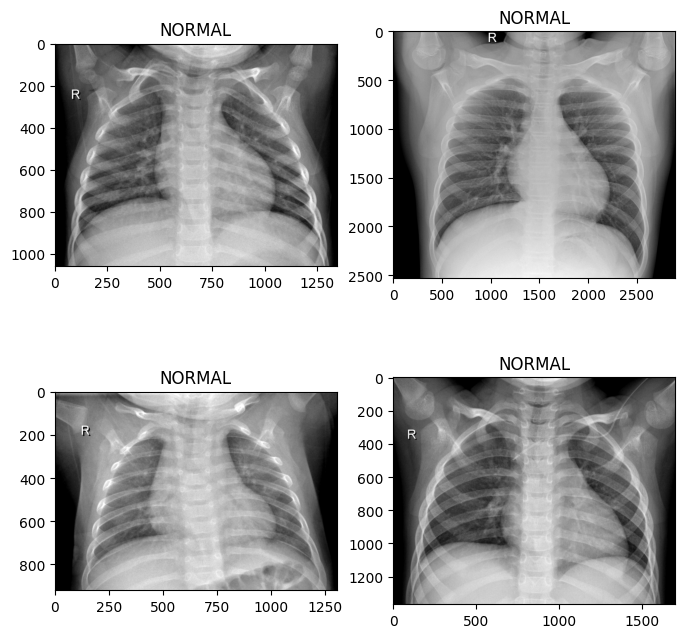

In [93]:
show_enhanced_images(4)

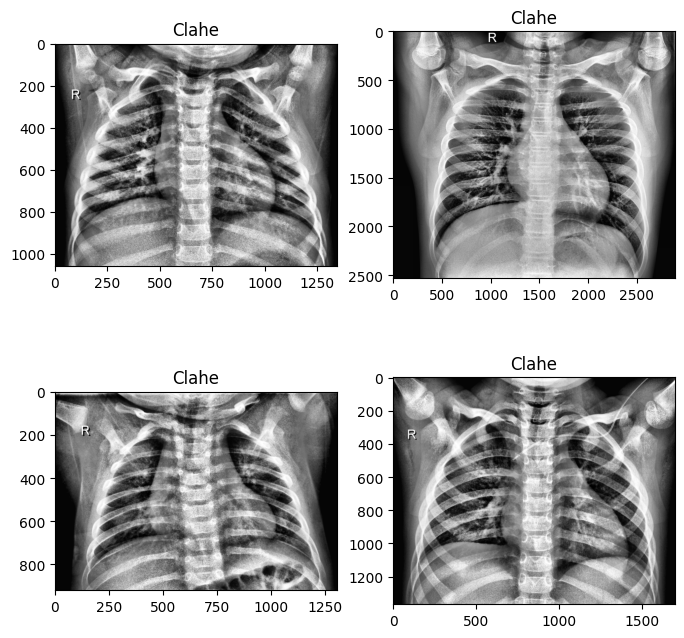

In [94]:
show_enhanced_images(4,False)

Clahe was chosen as the image enhancement approach because of a study titled Effect of image transformation on EfficientNet model for COVID-19 CT
image classification by Ebenezer et al. in 2022 in which a variety of image enhancement techniques such as CLAHE, Wavelet, Laplace, and adaptive gamma were utilised in an experiment to discover efficiency in image classification. Clahe surpassed the others with the greatest accuracy of 94.56% and was therefore picked.


In [98]:
#from skimage import exposure
#applying Clahe to the whole dataset 
#def apply_clahe(img):
  #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #eq = exposure.equalize_hist(gray)
  #clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
  #clahed = clahe.apply(eq)
  #return clahed

datagen = ImageDataGenerator(

      featurewise_center=False, 
      samplewise_center=False, 
      featurewise_std_normalization=False, 
      samplewise_std_normalization=False, 
      zca_whitening=False, 
      rotation_range = 30, 
      zoom_range = 0.2, 
      
      width_shift_range = 0.1, 
      height_shift_range = 0.1, 
      horizontal_flip = True, 
      vertical_flip=False,
      preprocessing_function= apply_clahe) 

datagen.fit(x_train)

The code above was supposed to input the clahe filter to all images however it was excluded for time

In [107]:
from keras.applications.inception_v3 import InceptionV3

# Notice 1st time this is being run, it will download the weights for the ResNet model
tf.keras.backend.clear_session()

base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    input_shape=(img_size, img_size, 3),
    include_top=False)
# freeze the layers
base_model.trainable = False


87910968/87910968 [==============================] - 5s 0us/step


InceptionV3 was the choosen transfer learning model as in the paper in section 1.1 it outperformed the other transfer learning models ResNet and VGG19.

In [108]:
def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(img_size,img_size, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [109]:
model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [110]:
#Fine tunning 
base_model.trainable = True

# Retrain the last 10 layers (all lower layers will be kept frozen)
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [111]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = tf.keras.optimizers.Adam(learning_rate=0.000002), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [112]:
Yhistory_ft = model_pretrained.fit(datagen.flow(x_train,y_train, batch_size = batch_size) ,
                    epochs = n_epochs , validation_data = datagen.flow(x_val, y_val) ,
                    callbacks = [learning_rate_reduction],
                    steps_per_epoch = x_train.shape[0]/batch_size,
                    class_weight = class_weight
                   )


Epoch 1/25
260/260 [============================>.] - ETA: 0s - loss: 0.8127 - binary_accuracy: 0.6047

260/260 [==============================] - 24s 71ms/step - loss: 0.8146 - binary_accuracy: 0.6040 - val_loss: 0.6468 - val_binary_accuracy: 0.6676 - lr: 2.0000e-06
Epoch 2/25
261/260 [==============================] - ETA: 0s - loss: 0.7318 - binary_accuracy: 0.6455

260/260 [==============================] - 16s 63ms/step - loss: 0.7318 - binary_accuracy: 0.6455 - val_loss: 0.5699 - val_binary_accuracy: 0.7414 - lr: 2.0000e-06
Epoch 3/25
261/260 [==============================] - ETA: 0s - loss: 0.6523 - binary_accuracy: 0.6814

260/260 [==============================] - 16s 61ms/step - loss: 0.6523 - binary_accuracy: 0.6814 - val_loss: 0.5495 - val_binary_accuracy: 0.7136 - lr: 2.0000e-06
Epoch 4/25
261/260 [==============================] - ETA: 0s - loss: 0.6238 - binary_accuracy: 0.7057

260/260 [==============================] - 17s 64ms/step - loss: 0.6238 - binary_accuracy: 0.7057 - val_loss: 0.5078 - val_binary_accuracy: 0.7682 - lr: 2.0000e-06
Epoch 5/25
261/260 [==============================] - ETA: 0s - loss: 0.5740 - binary_accuracy: 0.7270

260/260 [==============================] - 16s 60ms/step - loss: 0.5740 - binary_accuracy: 0.7270 - val_loss: 0.4824 - val_binary_accuracy: 0.7739 - lr: 2.0000e-06
Epoch 6/25
261/260 [==============================] - ETA: 0s - loss: 0.5557 - binary_accuracy: 0.7502

260/260 [==============================] - 16s 60ms/step - loss: 0.5557 - binary_accuracy: 0.7502 - val_loss: 0.4753 - val_binary_accuracy: 0.7826 - lr: 2.0000e-06
Epoch 7/25
260/260 [============================>.] - ETA: 0s - loss: 0.5300 - binary_accuracy: 0.7551

260/260 [==============================] - 16s 61ms/step - loss: 0.5296 - binary_accuracy: 0.7548 - val_loss: 0.4546 - val_binary_accuracy: 0.8027 - lr: 2.0000e-06
Epoch 8/25
261/260 [==============================] - ETA: 0s - loss: 0.4968 - binary_accuracy: 0.7785

260/260 [==============================] - 16s 62ms/step - loss: 0.4968 - binary_accuracy: 0.7785 - val_loss: 0.4163 - val_binary_accuracy: 0.8142 - lr: 2.0000e-06
Epoch 9/25
261/260 [==============================] - ETA: 0s - loss: 0.4844 - binary_accuracy: 0.7773

260/260 [==============================] - 15s 57ms/step - loss: 0.4844 - binary_accuracy: 0.7773 - val_loss: 0.4072 - val_binary_accuracy: 0.8218 - lr: 2.0000e-06
Epoch 10/25
260/260 [============================>.] - ETA: 0s - loss: 0.4847 - binary_accuracy: 0.7849

260/260 [==============================] - 16s 59ms/step - loss: 0.4849 - binary_accuracy: 0.7850 - val_loss: 0.4263 - val_binary_accuracy: 0.8132 - lr: 2.0000e-06
Epoch 11/25
260/260 [============================>.] - ETA: 0s - loss: 0.4663 - binary_accuracy: 0.7866

260/260 [==============================] - 17s 64ms/step - loss: 0.4674 - binary_accuracy: 0.7864 - val_loss: 0.4063 - val_binary_accuracy: 0.8180 - lr: 2.0000e-06
Epoch 12/25
261/260 [==============================] - ETA: 0s - loss: 0.4424 - binary_accuracy: 0.8138

260/260 [==============================] - 16s 62ms/step - loss: 0.4424 - binary_accuracy: 0.8138 - val_loss: 0.3675 - val_binary_accuracy: 0.8467 - lr: 2.0000e-06
Epoch 13/25
260/260 [============================>.] - ETA: 0s - loss: 0.4385 - binary_accuracy: 0.8126

260/260 [==============================] - 16s 62ms/step - loss: 0.4386 - binary_accuracy: 0.8126 - val_loss: 0.3980 - val_binary_accuracy: 0.8343 - lr: 2.0000e-06
Epoch 14/25
260/260 [============================>.] - ETA: 0s - loss: 0.4201 - binary_accuracy: 0.8104

260/260 [==============================] - 15s 58ms/step - loss: 0.4203 - binary_accuracy: 0.8104 - val_loss: 0.3645 - val_binary_accuracy: 0.8487 - lr: 2.0000e-06
Epoch 15/25
260/260 [============================>.] - ETA: 0s - loss: 0.4105 - binary_accuracy: 0.8246

260/260 [==============================] - 15s 56ms/step - loss: 0.4103 - binary_accuracy: 0.8248 - val_loss: 0.3651 - val_binary_accuracy: 0.8496 - lr: 2.0000e-06
Epoch 16/25
261/260 [==============================] - ETA: 0s - loss: 0.3916 - binary_accuracy: 0.8293

260/260 [==============================] - 15s 57ms/step - loss: 0.3916 - binary_accuracy: 0.8293 - val_loss: 0.3145 - val_binary_accuracy: 0.8707 - lr: 2.0000e-06
Epoch 17/25
260/260 [============================>.] - ETA: 0s - loss: 0.4070 - binary_accuracy: 0.8268

260/260 [==============================] - 15s 56ms/step - loss: 0.4070 - binary_accuracy: 0.8269 - val_loss: 0.3842 - val_binary_accuracy: 0.8458 - lr: 2.0000e-06
Epoch 18/25
260/260 [============================>.] - ETA: 0s - loss: 0.3854 - binary_accuracy: 0.8246

260/260 [==============================] - 15s 56ms/step - loss: 0.3847 - binary_accuracy: 0.8250 - val_loss: 0.3620 - val_binary_accuracy: 0.8429 - lr: 2.0000e-06
Epoch 19/25
261/260 [==============================] - ETA: 0s - loss: 0.4119 - binary_accuracy: 0.8250

260/260 [==============================] - 15s 56ms/step - loss: 0.4119 - binary_accuracy: 0.8250 - val_loss: 0.3475 - val_binary_accuracy: 0.8534 - lr: 2.0000e-06
Epoch 20/25
260/260 [============================>.] - ETA: 0s - loss: 0.3808 - binary_accuracy: 0.8321

260/260 [==============================] - 15s 57ms/step - loss: 0.3806 - binary_accuracy: 0.8320 - val_loss: 0.3144 - val_binary_accuracy: 0.8803 - lr: 2.0000e-06
Epoch 21/25
260/260 [============================>.] - ETA: 0s - loss: 0.3836 - binary_accuracy: 0.8323

260/260 [==============================] - 15s 58ms/step - loss: 0.3844 - binary_accuracy: 0.8317 - val_loss: 0.3452 - val_binary_accuracy: 0.8573 - lr: 2.0000e-06
Epoch 22/25
261/260 [==============================] - ETA: 0s - loss: 0.3823 - binary_accuracy: 0.8437

260/260 [==============================] - 14s 55ms/step - loss: 0.3823 - binary_accuracy: 0.8437 - val_loss: 0.3461 - val_binary_accuracy: 0.8534 - lr: 2.0000e-06
Epoch 23/25
261/260 [==============================] - ETA: 0s - loss: 0.3638 - binary_accuracy: 0.8468

260/260 [==============================] - 15s 56ms/step - loss: 0.3638 - binary_accuracy: 0.8468 - val_loss: 0.3675 - val_binary_accuracy: 0.8496 - lr: 2.0000e-06
Epoch 24/25
260/260 [============================>.] - ETA: 0s - loss: 0.3652 - binary_accuracy: 0.8443

260/260 [==============================] - 15s 57ms/step - loss: 0.3657 - binary_accuracy: 0.8440 - val_loss: 0.3474 - val_binary_accuracy: 0.8640 - lr: 2.0000e-06
Epoch 25/25
261/260 [==============================] - ETA: 0s - loss: 0.3587 - binary_accuracy: 0.8478

260/260 [==============================] - 15s 58ms/step - loss: 0.3587 - binary_accuracy: 0.8478 - val_loss: 0.3492 - val_binary_accuracy: 0.8544 - lr: 2.0000e-06


In [81]:
print("Loss of the model is - " , model_pretrained.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_pretrained.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 1s 40ms/step - loss: 0.2253 - binary_accuracy: 0.9119
Loss of the model is -  0.22528645396232605
20/20 [==============================] - 1s 36ms/step - loss: 0.2253 - binary_accuracy: 0.9119
Accuracy of the model is -  91.18589758872986 %


After the application of fine tunning this resulted in following the proposed three recommended strategies for altering CNN architecture and training technique by Xiong et al. 2018 who shared that they are specifically adding batch normalisation after the global pooling layer, doing identity categorization directly with only one fully-connected layer, and use Adam as an optimizer.



In [116]:
TLpredictions = model_pretrained.predict(x_test)
TLpred_labels= np.where(TLpredictions>0.5, 1, 0)


20/20 [==============================] - 1s 27ms/step


<Axes: >

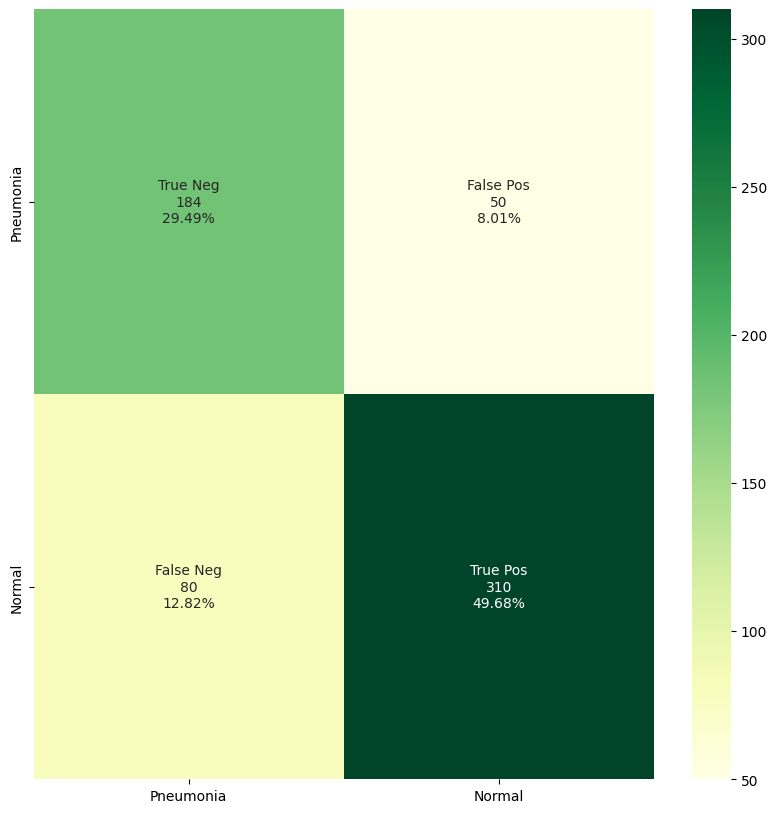

In [117]:
cf_matrix = confusion_matrix(y_test, TLpred_labels)
plt.figure(figsize = (10,10))

labels = ['TN','FP','FN','TP']
classes = ['Pneumonia','Normal']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap= "YlGn",
           xticklabels = classes,yticklabels = classes)

## Comparison of Models

The choice of evaulation metrics for the 2 models was a confusion matrics as this is a binary classification problem. This will be used along with the popular AUC(Mishra, 2020).

In [118]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
pred_labels= np.where(TLpred_labels>0.5, 1, 0)
print(classification_report(y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.70      0.79      0.74       234
   Normal (Class 1)       0.86      0.79      0.83       390

           accuracy                           0.79       624
          macro avg       0.78      0.79      0.78       624
       weighted avg       0.80      0.79      0.79       624



In [132]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, TLpredictions, pos_label=1)
print('AUC = ')
print(auc(fpr, tpr))

AUC = 
0.8512491781722551


Comparing the two Area under the Curve (AUC) the base model outperfromed the transfer learning and thus there was no improvement. This is somewhat expected as the reviewed paper stated that transfer learning did not outperform the novel model.

As well as comparing my model with the model from the paper in section 1.1. The paper in section 1.1 had 97.2% in accuracy with an AUC = 0.982 where as this model had an accurracy of 91.2% and an AUC of 0.95.

This attempt proved that the novel approach was infact the correct way to go as shown by the results of the paper in section 1.1 as transfer learning with fine tunning did not perform better than novel approaches that have similar architectures but did not use any transfer learning 

# References 


Ebenezer, A.S., Kanmani, S.D., Sivakumar, M. and Priya, S.J., 2022. Effect of image transformation on EfficientNet model for COVID-19 CT image classification. Materials Today: Proceedings, 51, pp.2512-2519.

Ioffe, S. and Szegedy, C., 2015, June. Batch normalization: Accelerating deep network training by reducing internal covariate shift. In International conference on machine learning (pp. 448-456). pmlr.

Mishra, A. (2020) Metrics to evaluate your machine learning algorithm, Medium. Towards Data Science. Available at: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234 (Accessed: March 25, 2023). 

Naveen (2023) Difference between leaky relu and ReLU activation function?, Nomidl. Available at: https://www.nomidl.com/deep-learning/difference-between-leaky-relu-and-relu-activation-function/ (Accessed: March 25, 2023).

Pal, K.K. and Sudeep, K.S., 2016, May. Preprocessing for image classification by convolutional neural networks. In 2016 IEEE International Conference on Recent Trends in Electronics, Information & Communication Technology (RTEICT) (pp. 1778-1781). IEEE.

Rajaraman, S., Ganesan, P. and Antani, S., 2022. Deep learning model calibration for improving performance in class-imbalanced medical image classification tasks. Plos one, 17(1), p.e0262838.

Szepesi, P. and Szilágyi, L., 2022. Detection of pneumonia using convolutional neural networks and deep learning. Biocybernetics and Biomedical Engineering, 42(3), pp.1012-1022.

Walter, B., 2023. Analysis of convolutional neural network image classifiers in a hierarchical max-pooling model with additional local pooling. Journal of Statistical Planning and Inference, 224, pp.109-126.

Xiong, F., Xiao, Y., Cao, Z., Gong, K., Fang, Z. and Zhou, J.T., 2019, May. Good practices on building effective CNN baseline model for person re-identification. In Tenth international conference on graphics and image processing (ICGIP 2018)(Vol. 11069, pp. 142-152). SPIE.

